In [29]:
import numpy as np
import pandas as pd

data = pd.read_csv('adult.csv', header=None, index_col=False,
                   names=['年龄','单位性质','权重','学历','受教育时长','婚姻状况','职业','家庭状况','种族','性别',
                          '资产所得','资产损失','周工作时长','原籍','收入'])

data_dummies = pd.get_dummies(data)

features = data_dummies.loc[:,'年龄':'原籍_ Yugoslavia']

X = features.values
y = data_dummies['收入_ >50K'].values

In [30]:
print(X.shape)
print(y.shape)

(32561, 108)
(32561,)


In [31]:
import numpy as np

pos = 0
neg = 0

for i in range(0, 32561):
    if(y[i] == 0):
        pos = pos + 1
    else:
        neg = neg + 1

print('pos =', pos)
print('neg =', neg)

pos = 24720
neg = 7841


In [32]:
pos = 0
neg = 0

X_pos = np.zeros(shape = (24720,108), dtype = int)
X_neg = np.zeros(shape = (7841,108), dtype = int)
y_pos = np.zeros(shape = (24720,), dtype = int)
y_neg = np.ones(shape = (7841,), dtype = int)

for i in range(0, 32561):
    if(y[i] == 0):
        X_pos[pos] = X[i]
        pos = pos + 1
    else:
        X_neg[neg] = X[i]
        neg = neg + 1

print(X)
print()
print(X_pos)
print()
print(X_neg)
print()
print(y_pos)
print()
print(y_neg)

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    58 151910      9 ...      1      0      0]
 [    22 201490      9 ...      1      0      0]
 [    52 287927      9 ...      1      0      0]]

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    27 257302     12 ...      1      0      0]
 [    58 151910      9 ...      1      0      0]
 [    22 201490      9 ...      1      0      0]]

[[    52 209642      9 ...      1      0      0]
 [    31  45781     14 ...      1      0      0]
 [    42 159449     13 ...      1      0      0]
 ...
 [    53 321865     14 ...      1      0      0]
 [    40 154374      9 ...      1      0      0]
 [    52 287927      9 ...      1      0      0]]

[0 0 0 ... 0 0 0]

[1 1 1 ... 1 1 1]


In [33]:
pospl = (int)(pos/10)
negpl = (int)(neg/10)
pl = pospl + negpl

print('pospl =', pospl)
print('negpl =', negpl)
print('pl =', pl)

pospl = 2472
negpl = 784
pl = 3256


In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [35]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

In [36]:
scores = np.zeros(shape = (10,))

for i in range(0, 10):
    for j in range(0, 10):
        if(i != j):
            gnb.fit(np.append(X_pos[pospl * j : pospl * (j + 1)], X_neg[negpl * j : negpl * (j + 1)], axis = 0),
                    np.append(y_pos[pospl * j : pospl * (j + 1)], y_neg[negpl * j : negpl * (j + 1)], axis = 0))
    scores[i] = gnb.score(np.append(X_pos[pospl * i : pospl * (i + 1)], X_neg[negpl * i : negpl * (i + 1)], axis = 0),
                          np.append(y_pos[pospl * i : pospl * (i + 1)], y_neg[negpl * i : negpl * (i + 1)], axis = 0))

print(scores)

score_sum = 0

for i in range(0, 10):
    score_sum = score_sum + scores[i]

score_mean = score_sum / 10

print(score_mean)

[0.78869779 0.79207617 0.78347666 0.78839066 0.78931204 0.79637592
 0.77886978 0.78900491 0.78716216 0.79914005]
0.7892506142506142


In [37]:
from sklearn.model_selection import cross_val_score

gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print('GaussianNB:')
print(gnb_scores)
print(gnb_scores.mean())
print()

bnb_scores = cross_val_score(bnb, X, y, cv=10, scoring='accuracy', n_jobs = -1)
print('BernoulliNB:')
print(bnb_scores)
print(bnb_scores.mean())

GaussianNB:
[0.79275407 0.79637592 0.78961916 0.79391892 0.79514742 0.8022113
 0.78501229 0.7985258  0.79484029 0.80436118]
0.795276635317317

BernoulliNB:
[0.76420018 0.754914   0.76504914 0.75644963 0.75552826 0.75644963
 0.75798526 0.76904177 0.76873464 0.75675676]
0.7605109275127697


In [38]:
from sklearn.metrics import confusion_matrix

gnb.fit(X, y)
y_predict_gnb = gnb.predict(X)

mat_gnb = confusion_matrix(y, y_predict_gnb)

print("GaussianNB混淆矩阵:")
print(mat_gnb)

P_gnb = mat_gnb[0, 0]/(mat_gnb[0, 0] + mat_gnb[1, 0])
print('P =', P_gnb)

R_gnb = mat_gnb[0, 0]/(mat_gnb[0, 0] + mat_gnb[0, 1])
print('R =', R_gnb)

F1_gnb = (2 * P_gnb * R_gnb)/(P_gnb + R_gnb)
print('F1 =', F1_gnb)

GaussianNB混淆矩阵:
[[23451  1269]
 [ 5403  2438]]
P = 0.8127469328342691
R = 0.9486650485436893
F1 = 0.8754619778250644


In [39]:
from sklearn.metrics import confusion_matrix

bnb.fit(X, y)
y_predict_bnb = bnb.predict(X)

mat_bnb = confusion_matrix(y, y_predict_bnb)

print("BernoulliNB混淆矩阵:")
print(mat_bnb)

P_bnb = mat_bnb[0, 0]/(mat_bnb[0, 0] + mat_bnb[1, 0])
print('P =', P_bnb)

R_bnb = mat_bnb[0, 0]/(mat_bnb[0, 0] + mat_bnb[0, 1])
print('R =', R_bnb)

F1_bnb = (2 * P_bnb * R_bnb)/(P_bnb + R_bnb)
print('F1 =', F1_bnb)

BernoulliNB混淆矩阵:
[[18642  6078]
 [ 1681  6160]]
P = 0.9172858337843822
R = 0.754126213592233
F1 = 0.8277423795040294


In [40]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(0, 32561):
    if(y[i] == 0):
        if(y_predict_gnb[i] == 0):
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if(y_predict_gnb[i] == 0):
            FP = FP + 1
        else:
            TN = TN + 1

print('GaussianNB:')
print(TP, ' ', FN)
print(FP, ' ', TN)

TP = 0
TN = 0
FP = 0
FN = 0

for i in range(0, 32561):
    if(y[i] == 0):
        if(y_predict_bnb[i] == 0):
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if(y_predict_bnb[i] == 0):
            FP = FP + 1
        else:
            TN = TN + 1

print('BernoulliNB:')
print(TP, ' ', FN)
print(FP, ' ', TN)

GaussianNB:
23451   1269
5403   2438
BernoulliNB:
18642   6078
1681   6160


Text(0, 0.5, 'Precision Rate')

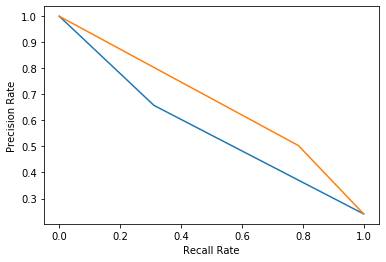

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision_gnb, recall_gnb, _ = precision_recall_curve(y, y_predict_gnb)
 
plt.plot(recall_gnb,precision_gnb)

precision_bnb, recall_bnb, _ = precision_recall_curve(y, y_predict_bnb)

plt.plot(recall_bnb,precision_bnb)

plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")


Text(0, 0.5, 'True Positive Rate')

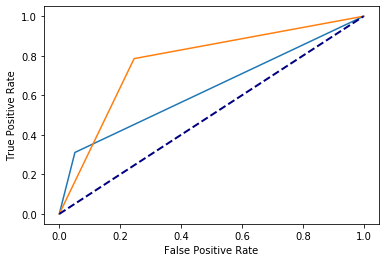

In [49]:
from sklearn.metrics import roc_curve

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y, y_predict_gnb)

plt.plot(fpr_gnb,tpr_gnb)

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y, y_predict_bnb)

plt.plot(fpr_bnb,tpr_bnb)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [44]:
from sklearn.metrics import auc

AUC_gnb = auc(fpr_gnb, tpr_gnb)

print('AUC_gnb =', AUC_gnb)

AUC_bnb = auc(fpr_bnb, tpr_bnb)

print('AUC_bnb =', AUC_bnb)

AUC_gnb = 0.6297973884473326
AUC_bnb = 0.7698701467144942


In [45]:
from  scipy.stats import ttest_rel

print(ttest_rel(gnb_scores, bnb_scores))

Ttest_relResult(statistic=12.772775624191672, pvalue=4.517143544558404e-07)


In [47]:
delta_scores = gnb_scores - bnb_scores
delta_std = np.std(delta_scores, ddof = 1)
delta_mean = np.mean(delta_scores)
tao = 10**0.5 * delta_mean / delta_std
print(tao)

12.772775624191672
